<a href="https://colab.research.google.com/github/SamuelWanjiru/Bike-sharing-forecast/blob/main/BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Bike Sharing Washington DC 🚲** 
---
## **Context**
Climate change is forcing cities to re-imaging their transportation infrastructure. Shared mobility concepts, such as car sharing, bike sharing or scooter sharing become more and more popular.
And if they are implemented well, they can actually contribute to mitigating climate change. Bike sharing in particular is interesting because no electricity of gasoline is necessary (unless e-bikes are used) for this mode of transportation. However, there are inherent problems to this type of shared mobility:
*   varying demand at bike sharing stations needs to be balanced to avoid oversupply or shortages
*   Heavily used bikes break down more often

Forecasting the future demand can help address those issues. Moreover, demand forecasts can help operators decide whether to expand the business, determine adequate prices and generate additional income through advertisements at particularly busy stations.
But that's not all. Another challenge is redistributing bikes between stations and determining the optimal routes. And determining the location of new stations is also an area of interest for operators.

## **Content**
This dataset can be used to forecast demand to avoid oversupply and shortages. It spans from January 1, 2011, until December 31, 2018. Determining new station locations, analyzing movement patterns or planning routes will only be possible with additional data.

## **Connecting/mounting the google drive**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Importing the relevant data analysis libraries**

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import math
from scipy.stats import kruskal, pearsonr, randint, uniform, chi2_contingency, boxcox
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss, acf, pacf
from datetime import datetime

## Loading the dataset from google drive and converting the date column to a datetime variable.

In [18]:
bike_data=pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Bike Sharing Washington DC/bike_sharing_dataset.csv')

## **Understanding the data**

In [19]:
# Displaying the 1st 5 rows of the bike dataset
bike_data.head()

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,330.0,629.0,959.0,NaN
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,130.0,651.0,781.0,NaN
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.0,1181.0,1301.0,NaN
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107.0,1429.0,1536.0,NaN
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,1489.0,1571.0,NaN


In [20]:
# Descriptive statistics
bike_data.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
count,2101.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,1503.0,208.0,694.0,129.0,...,5.0,84.0,36.0,10.0,4.0,1.0,2918.000000,2918.000000,2918.000000,89.0
mean,14.419007,8.506468,19.015689,11.069243,3.435734,3.162898,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1679.776217,6046.297121,7726.073338,1.0
std,9.556401,9.473941,9.835524,9.481232,8.183658,1.379582,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1560.762932,2756.888032,3745.220092,0.0
min,-12.100000,-16.993750,-7.980000,-15.658333,0.000000,0.375000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,19.000000,21.000000,1.0
25%,6.566667,0.516538,11.081562,3.013068,0.005510,2.200000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,512.250000,3839.250000,4628.500000,1.0
50%,15.433333,8.504911,19.992857,11.619091,0.271504,2.900000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1220.500000,5964.000000,7442.500000,1.0
75%,23.066667,17.338393,27.874583,19.767083,2.885381,3.875000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2357.250000,8187.500000,10849.500000,1.0
max,31.733333,26.206250,37.850000,28.666667,118.789796,12.750000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10173.000000,15419.000000,19113.000000,1.0


In [21]:
# Checking the data types of every varaible

bike_data.dtypes

date                  object
temp_avg             float64
temp_min             float64
temp_max             float64
temp_observ          float64
precip               float64
wind                 float64
wt_fog               float64
wt_heavy_fog         float64
wt_thunder           float64
wt_sleet             float64
wt_hail              float64
wt_glaze             float64
wt_haze              float64
wt_drift_snow        float64
wt_high_wind         float64
wt_mist              float64
wt_drizzle           float64
wt_rain              float64
wt_freeze_rain       float64
wt_snow              float64
wt_ground_fog        float64
wt_ice_fog           float64
wt_freeze_drizzle    float64
wt_unknown           float64
casual               float64
registered           float64
total_cust           float64
holiday              float64
dtype: object

### All the variables apart from date are float variables. The date variable is converted to a datetime variable at the point of data loading.


### **Checking and dealing with missing values**

In [22]:
bike_data.isnull().sum()

date                    0
temp_avg              821
temp_min                0
temp_max                0
temp_observ             0
precip                  0
wind                    0
wt_fog               1419
wt_heavy_fog         2714
wt_thunder           2228
wt_sleet             2793
wt_hail              2872
wt_glaze             2769
wt_haze              2217
wt_drift_snow        2915
wt_high_wind         2664
wt_mist              2551
wt_drizzle           2794
wt_rain              2516
wt_freeze_rain       2917
wt_snow              2838
wt_ground_fog        2886
wt_ice_fog           2912
wt_freeze_drizzle    2918
wt_unknown           2921
casual                  4
registered              4
total_cust              4
holiday              2833
dtype: int64

In [23]:
# fill missing values with 0 where applicable

wt_features = [x for x in bike_data.columns if 'wt' in x]
bike_data['holiday'] = bike_data['holiday'].fillna(0)
bike_data[wt_features] = bike_data[wt_features].fillna(0)

In [24]:
# check casual, registered and total_cust missing rows
missing_target = bike_data[bike_data['total_cust'].isna()]
missing_target

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
1848,2016-01-23,-4.366667,-6.128571,-2.392857,-4.688889,42.045946,8.08,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1849,2016-01-24,-2.666667,-7.985714,-1.028571,-6.366667,19.339130,3.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1850,2016-01-25,-5.133333,-11.128571,2.028571,-9.877778,0.000000,1.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1851,2016-01-26,2.333333,-7.871429,7.471429,3.588889,0.000000,2.85,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


There seem to be four days where no data was captured for the rented bikes. 
Being a time series, i will interpolate these missing values using the forward fill method.

In [25]:
# filling the missing values in the customer variables with forward fill method
bike_data[['total_cust', 'casual', 'registered']] = bike_data[['total_cust', 'casual', 'registered']].fillna( method='ffill')
bike_data.isnull().sum()

date                   0
temp_avg             821
temp_min               0
temp_max               0
temp_observ            0
precip                 0
wind                   0
wt_fog                 0
wt_heavy_fog           0
wt_thunder             0
wt_sleet               0
wt_hail                0
wt_glaze               0
wt_haze                0
wt_drift_snow          0
wt_high_wind           0
wt_mist                0
wt_drizzle             0
wt_rain                0
wt_freeze_rain         0
wt_snow                0
wt_ground_fog          0
wt_ice_fog             0
wt_freeze_drizzle      0
wt_unknown             0
casual                 0
registered             0
total_cust             0
holiday                0
dtype: int64

In [26]:
# check what the correlation between the different temperature features and total_cust is
# correlation between temp_avg and total_cust excluding the first 820 rows

print('temp_avg:', pearsonr(bike_data['temp_avg'][821:], bike_data['total_cust'][821:]))

# correlation between temp_min and total_cust
print('temp_min:', pearsonr(bike_data['temp_min'], bike_data['total_cust']))
print('temp_min, without first 820 rows:', pearsonr(bike_data['temp_min'][821:], bike_data['total_cust'][821:]))

# correlation between temp_max and total_cust
print('temp_max:', pearsonr(bike_data['temp_max'], bike_data['total_cust']))
print('temp_max, without first 820 rows:', pearsonr(bike_data['temp_max'][821:], bike_data['total_cust'][821:]))

# correlation between temp_observ and total_cust
print('temp_observ:', pearsonr(bike_data['temp_observ'], bike_data['total_cust']))
print('temp_observ, without first 820 rows:', pearsonr(bike_data['temp_observ'][821:], bike_data['total_cust'][821:]))

temp_avg: (0.7289653483071338, 0.0)
temp_min: (0.5484063784007367, 3.92265728990609e-229)
temp_min, without first 820 rows: (0.6720561174778342, 3.5204893405440216e-276)
temp_max: (0.5962507437902363, 6.986689659232709e-281)
temp_max, without first 820 rows: (0.7406902128448435, 0.0)
temp_observ: (0.5500110613450737, 9.817169026462281e-231)
temp_observ, without first 820 rows: (0.6804926361142358, 9.041087867799183e-286)


The above shows that disregarding the first 820 rows leads to the highest correlation between temp_max and total_cust. Comparing temp_avg with the entire dataset and the respective correlations with total_cust, temp_avg has the highest correlation.

The Granger causality is a more appropriate measure for timeseries data and determining whether one time series is useful in forecasting another. Thus, below I am using the Granger causality test to see how the temperature features cause total_cust.

In [27]:
# calculating the Granger causality between the temperature feats and the target
print('Average temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_avg']][821:], maxlag=1);
print('\nMaximum temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_max']], maxlag=1);
print('\nMinimum temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_min']], maxlag=1);
print('\nObserved temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_observ']], maxlag=1);

Average temperature and target:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=176.4496, p=0.0000  , df_denom=2097, df_num=1
ssr based chi2 test:   chi2=176.7020, p=0.0000  , df=1
likelihood ratio test: chi2=169.6602, p=0.0000  , df=1
parameter F test:         F=176.4496, p=0.0000  , df_denom=2097, df_num=1

Maximum temperature and target:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=40.0233 , p=0.0000  , df_denom=2918, df_num=1
ssr based chi2 test:   chi2=40.0645 , p=0.0000  , df=1
likelihood ratio test: chi2=39.7922 , p=0.0000  , df=1
parameter F test:         F=40.0233 , p=0.0000  , df_denom=2918, df_num=1

Minimum temperature and target:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=88.8911 , p=0.0000  , df_denom=2918, df_num=1
ssr based chi2 test:   chi2=88.9825 , p=0.0000  , df=1
likelihood ratio test: chi2=87.6540 , p=0.0000  , df=1
parameter F test:         F=88.8911 , p=0.0000  , df_denom=2918,

**Data Preprocessing** : Below I will engineer some new features from the categorical and numeric features

In [28]:
# function to create seasons for dataframe

def seasons(df):
    '''
    Function to create new features for seasons based on months
    Args: df = dataframe
    Returns: df = dataframe
    Seasons: Spring, Summer & Fall
    '''
    
    # create a season features
    df['spring'] = df['date'].apply(lambda x: 1 if '01' in x[5:7] else 1 if '02' in x[5:7] else 1 
                                                     if '03' in x[5:7] else 0)
    df['summer'] = df['date'].apply(lambda x: 1 if '04' in x[5:7] else 1 if '05' in x[5:7] else 1 
                                                     if '06' in x[5:7] else 0)
    df['fall'] = df['date'].apply(lambda x: 1 if '07' in x[5:7] else 1 if '08' in x[5:7] else 1 
                                                     if '09' in x[5:7] else 0)
    
    return df

In [29]:
# create new features for seasons

bike_data = seasons(bike_data)

In [33]:
# create new feature weekday

bike_data['date_datetime'] = bike_data['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

bike_data['weekday'] = bike_data['date_datetime'].apply(lambda x: x.weekday())

In [34]:
# one hot encode the feature weekday: returns a new dataframe with a column for every "level" of rating that exists,
# along with either a 1 or 0 specifying the presence of that rating for a given observation.

weekday_dummies = pd.get_dummies(bike_data['weekday'], prefix='weekday', drop_first=True)
bike_data = bike_data.join(weekday_dummies, how='left')
bike_data.head()

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,summer,fall,date_datetime,weekday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,0.0,0.0,...,0,0,2011-01-01,5,0,0,0,0,1,0
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,0.0,...,0,0,2011-01-02,6,0,0,0,0,0,1
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,0.0,0.0,0.0,...,0,0,2011-01-03,0,0,0,0,0,0,0
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800,0.0,0.0,0.0,...,0,0,2011-01-04,1,1,0,0,0,0,0
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950,0.0,0.0,0.0,...,0,0,2011-01-05,2,0,1,0,0,0,0


In [37]:
# create new feature working_day

bike_data['working_day'] = bike_data['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
bike_data['working_day'] = bike_data[['holiday', 'working_day']].apply(
    lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)
bike_data.head(3)

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,fall,date_datetime,weekday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,working_day
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,0.0,0.0,...,0,2011-01-01,5,0,0,0,0,1,0,1.0
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,0.0,...,0,2011-01-02,6,0,0,0,0,0,1,0.0
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,0.0,0.0,0.0,...,0,2011-01-03,0,0,0,0,0,0,0,0.0


**Dropping unnecessary columns**

I will drop the date feature and keep the date_datetime feature to have the feature with the correct date formatting. The registered and casual features will also be dropped because they are sub-features of the total_cust target label. I will also drop the temp_avg variable.

In [38]:
bike_data.drop(columns=['date', 'temp_avg', 'registered', 'casual'], inplace=True)

## **Exploratory Data Analysis**

We will start with analysing the categorical variables, that is, seasons

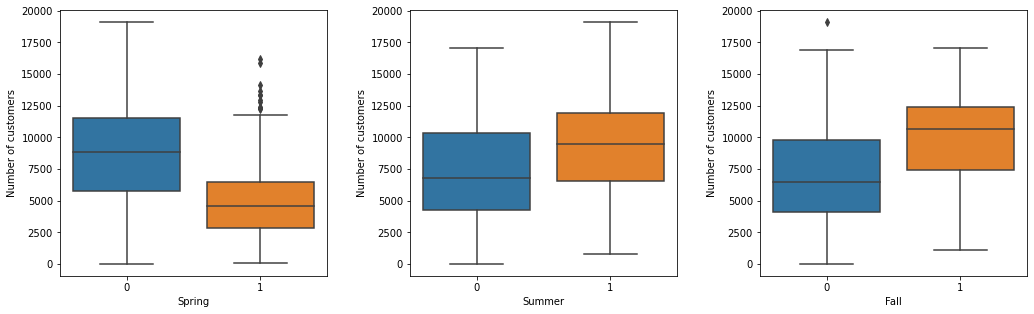

In [50]:
# variable to be used below to iterate through the columns and plot them

season = ['spring', 'summer', 'fall']

# plot boxplots for season versus number of users

plt.figure(figsize = [15, 5])

# boxplot for feature workingday

plt.subplot(1, 3, 1)
sb.boxplot(data = bike_data, x = 'spring', y = 'total_cust')
plt.xlabel('Spring')
plt.ylabel('Number of customers')

# boxplot for feature weekday

plt.subplot(1, 3, 2)
sb.boxplot(data = bike_data, x = 'summer', y = 'total_cust')
plt.xlabel('Summer')
plt.ylabel('Number of customers')

# boxplot for feature holiday
colors = ['lightblue', 'lightgreen']
plt.subplot(1, 3, 3)
sb.boxplot(data = bike_data, x = 'fall', y = 'total_cust')
plt.xlabel('Fall')
plt.ylabel('Number of customers');

plt.tight_layout(pad=3.0) # Using padding to space the subplots for better viewing
plt.show();

 Correlation between season features and the maximum temperature

*   using the Kruskal Wallis H test for correlations between a continuous and categorical variable



In [52]:
kruskal(bike_data['temp_max'], bike_data['summer'])

KruskalResult(statistic=4190.233790975473, pvalue=0.0)

The season feature clearly determines the customer demand for bikes, so this feature will be used for the final model.

### **Holiday**
The features holiday, weekday and workingday have some overlaps in their prediction of customer demand, thus, I will first analyze each individual feature and then investigate their correlation.

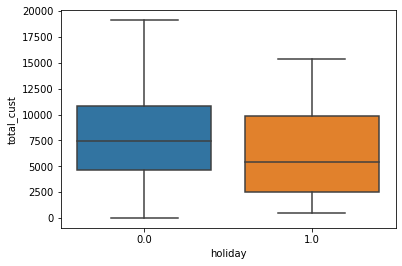

In [53]:
# plotting the customer statistics in form of a boxplot for the holiday feature

sb.boxplot(data = bike_data, x = 'holiday', y = 'total_cust');

For the holiday feature, we can clearly see that there is on average a higher demand for bikes on days that are not holidays. This feature will be used in the final model to predict the overall demand.

In [54]:
# Correlation between holiday feature and the number of customers per day

# using the Kruskal Wallis H test for correlations between a continuous and categorical variable

kruskal(bike_data['holiday'], bike_data['total_cust'])

KruskalResult(statistic=4945.69275502358, pvalue=0.0)

### **Weekday**

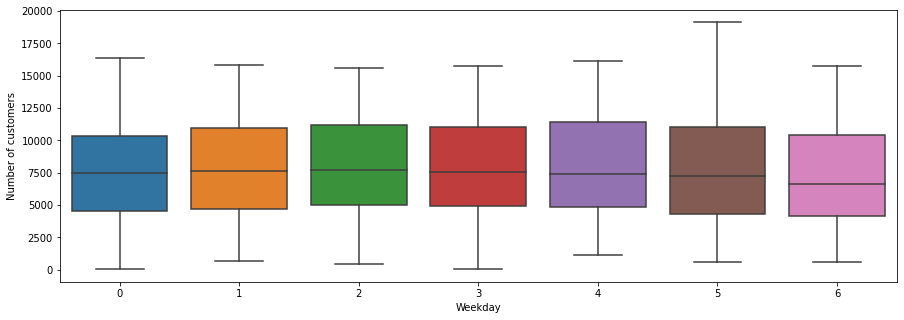

In [55]:
# plotting the customer statistics in form of a boxplot for the weekday feature

plt.figure(figsize = [15, 5])
sb.boxplot(data = bike_data, x = 'weekday', y = 'total_cust')
plt.xlabel('Weekday')
plt.ylabel('Number of customers');

In [56]:
# Correlation between weekday feature and the number of customers per day

# using Pearson's correlation coefficient because I'm assuming that weekday can be 

# considered a continuous variable

pearsonr(bike_data['weekday'], bike_data['total_cust'])

(-0.024760898572408853, 0.18086518739719304)

Based on the above distributions of number of customers per weekday, it appears that there are slight difference in demand depending on what weekday it is. Thus, the weekday will be considered to forecast the bike demand. But I still need to onehot encode the weekday because it is a categorical feature.